# Algotytm przecinania się odcinków na płaszczyźnie

In [205]:
import numpy as np
import pandas as pd
from bitalg.tests.test4 import Test
from bitalg.visualizer.main import Visualizer

# Przydatne funkcje 

In [206]:
def draw_example_1():
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))

    vis.add_line_segment(line_segments)
    vis.show()
    
def draw_example_2():
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))
    points = [(4, 2),
              (2.5, 3.5),
              (5.5, 4.5)]

    vis.add_line_segment(line_segments)
    vis.add_point(points, color='red')
    vis.show()


### Wprowadzenie
Celem ćwiczenia jest implementacja i zapoznanie się z algorytmem wyznaczającym wszystkie przecięcia się odcinków na płaszczyźnie

### Przykładowy zbiór odcinków przed wyznaczeniem punktów przecięcia

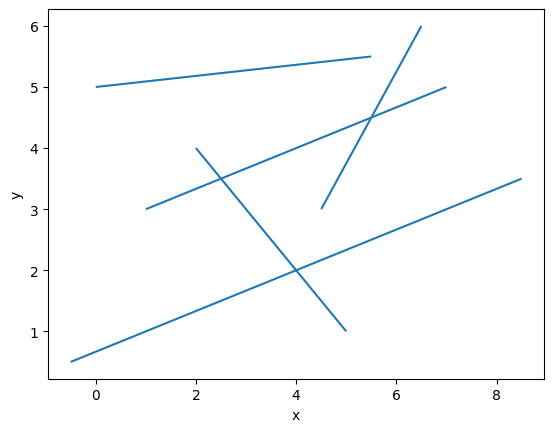

In [207]:
draw_example_1()

### Przykładowy zbiór odcinków po wyznaczenu punktów przecięcia

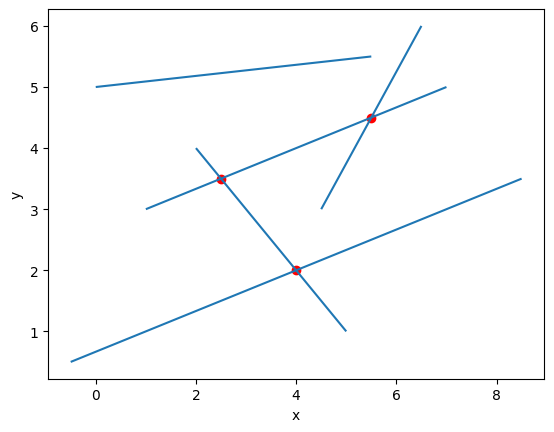

In [208]:
draw_example_2()

# Generowanie losowych odcinków na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_sections```

In [209]:
def generate_uniform_sections(max_x, max_y, n):
    """
    Funkcja generuje odcinki o współrzędnych rzeczywistych w postaci par punktów. 
    Żaden wygenerowany odcinek nie jest odcinkiem pionowym.
    Żadne dwa odcinki nie mają swoich końców o takiej samej współrzędnej x.
    Zakres współrzędnych: x -> (0, max_x), y -> (0, max_y)
    :param max_x: określa maksymalną wartość współrzednej x jaka może zostać wylosowana
    :param max_y: określa maksymalną wartość współrzednej y jaka może zostać wylosowana
    :param n: ilość generowanych odcinków
    :return: tablica odcinków w postaci krotek zawierających parę krotek współrzędnych punktów końcowych odcinków
    np. [((x1, y1), (x2, y2)), ((x3, y3), (x4, y4)),...]
    """
    from random import uniform, seed
    seed(20)

    def generate_line():
        x1, y1 = uniform(0,max_x), uniform(0,max_y)
        x2, y2 = uniform(0,max_x), uniform(0,max_y)

        while x2 == x1: x2 = uniform(0,max_x)

        point1 = (x1,y1)
        point2 = (x2,y2)
        return (point1, point2)

    lines = []
    points = set()
    for _ in range(n):

        point1, point2 = generate_line()

        while (point1 in points) or (point2 in points): point1, point2 = generate_line 
        
        points.add(point1)
        points.add(point2)

        lines.append((point1, point2))
        
    return lines

In [210]:
Test().runtest(1, generate_uniform_sections)

Lab 4, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.066s


<span style="color:red">Ćw.</span> Wygeneruj $\large20$ losowych odcinków w przestrzeni 2D o współrzędnych z przedziału $\large x \in \langle 0,1000 \rangle$ oraz $\large y \in \langle 0,1000\rangle$. 

In [211]:
random_sections = generate_uniform_sections(1000,1000,20)

Zwizualizuj otrzymane odcinki

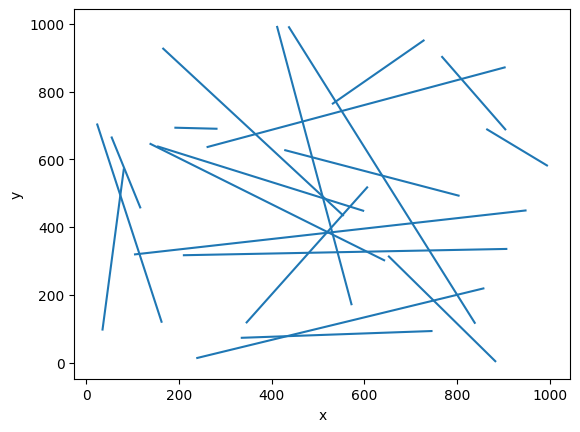

In [212]:
def draw_sections(S):
    visualize = Visualizer()
    visualize.add_line_segment(S)
    visualize.show()
draw_sections(random_sections)

Uzupełnij funkcję ```add_sections``` #interaktywne dodawanie odcinków przez rysowanie myszką

In [213]:
import matplotlib.pyplot as plt

def add_sections(sections):
    points = []

    def onclick(event):
        if event.button == 1: # left click
            x, y = event.xdata, event.ydata
            points.append((x,y))
            plt.plot(x,y,'bo')
            plt.draw()
        
        if len(points) >= 2:
            xs = [points[0][0], points[1][0]]
            ys = [points[0][1], points[1][1]]
            new_line = (points[0], points[1])
            sections.append(new_line)
            plt.plot(xs, ys, 'b-')
            points.clear()
            plt.draw()

    def on_key(event):

        if event.key == ' ':
            plt.close(fig)

        elif event.key == 'r':
            points.clear()
            plt.cla()
            ax.set_xlim(0,10)
            ax.set_ylim(0,10)
            plt.draw()

    fig, ax = plt.subplots()
    ax.set_xlim(0,10)
    ax.set_ylim(0,10)
    ax.set_title(f'Sections')

    fig.canvas.mpl_connect('button_press_event', onclick)
    fig.canvas.mpl_connect('key_press_event', on_key)

    plt.show()
    return sections

In [214]:
%matplotlib tk
my_sections = add_sections([])
plt.show(block = True)

invalid command name "132115055676224process_stream_events"
    while executing
"132115055676224process_stream_events"
    ("after" script)


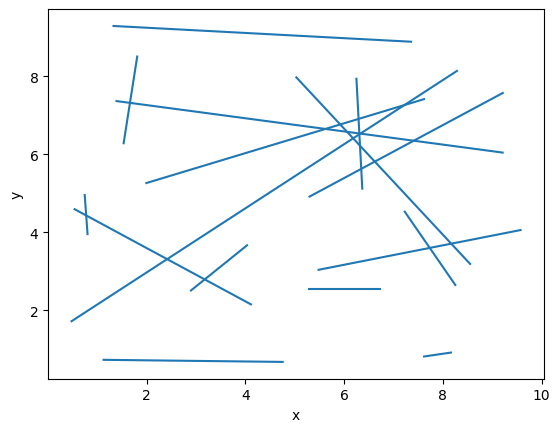

In [215]:
%matplotlib inline
draw_sections(my_sections)

# Przygotowanie odpowiednich struktur do użycia
- Klasa `Point` określa jeden punkt w przestrzeci dwuwymiarowej, posiada atrybuty x i y, które są odpowiednikami współrzędnych tego punktu na płaszczyźnie kartezjańskiej. Posiada konstruktor i metody przeciążające operator (==) oraz (>), aby można było określić zależność między dwoma punktami. Posiada także metodę hash, która odpowiednio hashuje atrybuty klasy.

- Klasa `Segment` określa odcinek między dwoma punktami, posiada atrybuty w postaci punktów końcowych tego odcinka, są one klasy `Point`, a także jednoznacznie określające prosą parametry alpha i beta czyli współczynnik kierunkowy prostej i wyraz wolny. Podobnie jak klasa opisana wyżej, `Segment` posiada metody przeciążające oraz metodę hashującą.

In [216]:
class Point:
    def __init__(self, x, y) -> None:
        self.x = x
        self.y = y

    def __eq__(self, other_point) -> bool:
        return self.x ==  other_point.x and self.y == other_point.y
    
    # Punkty muszą być porównywalne względem współrzędnej x
    def __gt__(self, other_point):
        return self.x > other_point.x

    def __hash__(self):
        return hash((self.x, self.y))
    
    def __repr__(self) -> str:
        return f'{self.x, self.y}'

class Segment:
    def __init__(self, pointA:Point, pointB:Point) -> None:
        if pointA.x > pointB.x:
            pointA, pointB = pointB, pointA
        self.pointA = pointA
        self.pointB = pointB
        self.alpha = (self.pointB.y - self.pointA.y) / (self.pointB.x - self.pointA.x)
        self.beta = (self.pointA.y - self.alpha * self.pointA.x)
        self.x = pointA.x

    def __eq__(self, other_segment) -> bool:
        return self.pointA == other_segment.pointA and self.pointB == other_segment.pointB
    
    # Odcinek self jest POWYŻEJ odcinka other_segment w x jeśli self i other_segment są porównywalne
    # w x oraz przecięcie self z miotłą w x jest wyżej niż przecięcie other_segment z tą miotłą
    def __gt__(self, other_segment):
        return self.alpha * Segment.x + self.beta > other_segment.alpha * Segment.x + other_segment.beta

    def __hash__(self):
        return hash((self.pointA, self.pointB))
    
    @staticmethod
    def update_x(value):
        Segment.x = value

    def __repr__(self) -> str:
        #return f'{self.pointA, self.pointB}'
        return f'y = {self.alpha}x + {self.beta}'
    
    def get_line_segment(self):
        return ((self.pointA.x, self.pointA.y), (self.pointB.x, self.pointB.y))

In [217]:
def crossing(seg1: Segment, seg2: Segment) -> Point:
    if seg1.alpha == seg2.alpha: return None
    x = (seg1.beta - seg2.beta) / (seg2.alpha - seg1.alpha)
    if max(seg1.pointA.x, seg2.pointA.x) <= x <= min(seg1.pointB.x, seg2.pointB.x):
        y = seg1.alpha * x + seg1.beta
        return Point(x,y)
    return None

Uzupełnij funkcję ```is_intersection```

In [218]:
def is_intersection(sections):
    """
    Funkcja sprawdza czy jakakolwiek para podanych odcinków się przecina 
    :param sections: tablica odcinków w postaci krotek krotek współrzędnych punktów końcowych odcinków
    :param eps: epsilon będący dokładnością, z jaką porównujemy liczby zmiennoprzecinkowe
    :return: True / False
    """
    raise Exception("Unimplemented")

In [219]:
Test().runtest(2, is_intersection)

Lab 4, task 2:
	Test 1: 

Exception: Unimplemented

### W jaki sposób zaimplementowałeś struktura stanu (stan miotły) oraz struktura zdarzeń w Twoim programie?

In [ ]:
# Odpowiedź here

Uzupełnij funkcję ```is_intersection_with_visualization```

In [ ]:
def is_intersection_with_visualization(sections):
    """
    Funkcja sprawdza czy jakakolwiek para podanych odcinków się przecina i dodatkowo zwraca kolejne kroki w wizualizacji 
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: True / False
    """
    raise Exception("Unimplemented")

Uzupełnij funkcję ```find_intersections```

In [ ]:
def find_intersections(sections):
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]
    """
    from sortedcontainers import SortedSet

    n = len(sections)

    # Q zawiera uporządkowane rosnąco względem x-ów końce odcinków oraz punkty przecięć wszystkich
    # par odcinków aktywnych, które kiedykolwiek były sąsiadami w strukturze.
    Q = SortedSet(key = lambda x: x[0])
    considered_segments = []

    for i in range(n):
        x1, y1 = sections[i][0]
        x2, y2 = sections[i][1]
        P1 = Point(x1,y1)
        P2 = Point(x2,y2)
        considered_segments.append(Segment(P1, P2))
        if P2 > P1:
            Q.add((P1, i, 'L'))
            Q.add((P2, i, 'R'))
        else:
            Q.add((P2, i, 'L'))
            Q.add((P1, i, 'R'))

    T = SortedSet(key = lambda x: x[0])
    processed_segments = set()
    interesections = []

    while len(Q) > 0:
        #print("T:", T)
        event_point, event_i, event_dir = Q.pop(0)

        new_neighbours = []

        # aktualizowanie struktury T
        if event_dir == 'L':
            Segment.update_x(event_point.x)
            event_segment = considered_segments[event_i]
        
            T.add((event_segment, event_i))
            index = T.index((event_segment, event_i))
            
            if index > 0: 
                _neighbour_event_segment, neighbour_event_i = T[index-1]
                i1, i2 = min(event_i, neighbour_event_i), max(event_i, neighbour_event_i)
                if (i1,i2) not in processed_segments:
                    processed_segments.add((i1,i2))
                    new_neighbours.append((i1,i2))

            if index < len(T) - 1:
                _neighbour_event_segment, neighbour_event_i = T[index+1]
                i1, i2 = min(event_i, neighbour_event_i), max(event_i, neighbour_event_i)
                if (i1,i2) not in processed_segments:
                    processed_segments.add((i1,i2))
                    new_neighbours.append((i1,i2))

        elif event_dir == 'R':
            Segment.update_x(event_point.x)
            event_segment = considered_segments[event_i]
            
            index = T.index((event_segment, event_i))
            if index > 0 and index < len(T)-1:
                _prev_neighbour, prev_i = T[index-1]
                _next_neighbour, next_i = T[index+1]
                i1, i2 = min(prev_i, next_i), max(prev_i, next_i)
                if (i1,i2) not in processed_segments:
                    processed_segments.add((i1,i2))
                    new_neighbours.append((i1,i2))

            del T[index]
        
        else:
            i1, i2 = event_i
            event_segment_1 = considered_segments[i1]
            event_segment_2 = considered_segments[i2]
            index1 = T.index((event_segment_1, i1))
            index2 = T.index((event_segment_2, i2))

            if index1 < index2: 
                del T[index2]
                del T[index1]
            else:
                del T[index1]
                del T[index2]

            Segment.update_x(event_point.x + 1e-12)

            T.add((event_segment_1, i1))
            T.add((event_segment_2, i2))
            index1 = T.index((event_segment_1, i1))
            index2 = T.index((event_segment_2, i2))

            if index1 > 0: 
                _neighbour_event_segment, neighbour_event_i = T[index1-1]
                a1, a2 = min(i1, neighbour_event_i), max(i1, neighbour_event_i)
                if (a1,a2) not in processed_segments:
                    processed_segments.add((a1,a2))
                    new_neighbours.append((a1,a2))

            if index1 < len(T) - 1:
                _neighbour_event_segment, neighbour_event_i = T[index1+1]
                a1, a2 = min(i1, neighbour_event_i), max(i1, neighbour_event_i)
                if (a1,a2) not in processed_segments:
                    processed_segments.add((a1,a2))
                    new_neighbours.append((a1,a2))

            if index2 > 0: 
                _neighbour_event_segment, neighbour_event_i = T[index2-1]
                a1, a2 = min(i2, neighbour_event_i), max(i2, neighbour_event_i)
                if (a1,a2) not in processed_segments:
                    processed_segments.add((a1,a2))
                    new_neighbours.append((a1,a2))

            if index2 < len(T) - 1:
                _neighbour_event_segment, neighbour_event_i = T[index2+1]
                a1, a2 = min(i2, neighbour_event_i), max(i2, neighbour_event_i)
                if (a1,a2) not in processed_segments:
                    processed_segments.add((a1,a2))
                    new_neighbours.append((a1,a2))

        # aktualizowanie struktury Q
        for (i1,i2) in new_neighbours:
            cross_point = crossing(considered_segments[i1], considered_segments[i2])
            if cross_point is not None:
                interesections.append(((cross_point.x, cross_point.y), i1+1, i2+1))
                Q.add((cross_point, (i1,i2), 'C'))

    return interesections


In [ ]:
Test().runtest(3, find_intersections)

Lab 4, task 3:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.004s


Uzupełnij funkcję ```find_intersections_with_visualization```

In [ ]:
def find_intersections_with_visualization(sections):
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków i dodatkowo zwraca kolejne kroki w wizualizacji 
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]
    """
    from sortedcontainers import SortedSet

    vis = Visualizer()
    vis.add_line_segment(sections, color = 'blue')
    n = len(sections)

    # Q zawiera uporządkowane rosnąco względem x-ów końce odcinków oraz punkty przecięć wszystkich
    # par odcinków aktywnych, które kiedykolwiek były sąsiadami w strukturze.
    Q = SortedSet(key = lambda x: x[0])
    considered_segments = []

    for i in range(n):
        x1, y1 = sections[i][0]
        x2, y2 = sections[i][1]
        P1 = Point(x1,y1)
        P2 = Point(x2,y2)
        considered_segments.append(Segment(P1, P2))
        if P2 > P1:
            Q.add((P1, i, 'L'))
            vis.add_point((x1,y1), color = 'green')
            Q.add((P2, i, 'R'))
            vis.add_point((x2,y2), color = 'darkblue')
        else:
            Q.add((P2, i, 'L'))
            vis.add_point((x2,y2), color = 'green')
            Q.add((P1, i, 'R'))
            vis.add_point((x1,y1), color = 'darkblue')

    T = SortedSet(key = lambda x: x[0])
    TVIS = {}
    processed_segments = set()
    interesections = []

    while len(Q) > 0:
        #print("T:", T)
        event_point, event_i, event_dir = Q.pop(0)
        broom = vis.add_line(((event_point.x, event_point.y), (event_point.x, 0)), color = 'black')

        new_neighbours = []

        # aktualizowanie struktury T
        if event_dir == 'L':
            Segment.update_x(event_point.x)
            event_segment = considered_segments[event_i]
        
            T.add((event_segment, event_i))
            TVIS[(event_segment, event_i)] = vis.add_line_segment( event_segment.get_line_segment(), color = 'lavender')
            index = T.index((event_segment, event_i))
            
            if index > 0: 
                neighbour_event_segment, neighbour_event_i = T[index-1]

                i1, i2 = min(event_i, neighbour_event_i), max(event_i, neighbour_event_i)
                if (i1,i2) not in processed_segments:
                    processed_segments.add((i1,i2))
                    new_neighbours.append((i1,i2))

            if index < len(T) - 1:
                neighbour_event_segment, neighbour_event_i = T[index+1]

                i1, i2 = min(event_i, neighbour_event_i), max(event_i, neighbour_event_i)
                if (i1,i2) not in processed_segments:
                    processed_segments.add((i1,i2))
                    new_neighbours.append((i1,i2))

        elif event_dir == 'R':
            Segment.update_x(event_point.x)
            event_segment = considered_segments[event_i]
            
            index = T.index((event_segment, event_i))
            if index > 0 and index < len(T)-1:
                _prev_neighbour, prev_i = T[index-1]
                _next_neighbour, next_i = T[index+1]
                i1, i2 = min(prev_i, next_i), max(prev_i, next_i)
                if (i1,i2) not in processed_segments:
                    processed_segments.add((i1,i2))
                    new_neighbours.append((i1,i2))

            del T[index]
            vis.remove_figure(TVIS[(event_segment, event_i)])
        
        else:
            i1, i2 = event_i
            event_segment_1 = considered_segments[i1]
            event_segment_2 = considered_segments[i2]
            index1 = T.index((event_segment_1, i1))
            index2 = T.index((event_segment_2, i2))

            if index1 < index2: 
                del T[index2]
                del T[index1]
            else:
                del T[index1]
                del T[index2]

            Segment.update_x(event_point.x + 1e-12)

            T.add((event_segment_1, i1))
            T.add((event_segment_2, i2))
            index1 = T.index((event_segment_1, i1))
            index2 = T.index((event_segment_2, i2))

            if index1 > 0: 
                neighbour_event_segment, neighbour_event_i = T[index1-1]
                a1, a2 = min(i1, neighbour_event_i), max(i1, neighbour_event_i)
                if (a1,a2) not in processed_segments:
                    processed_segments.add((a1,a2))
                    new_neighbours.append((a1,a2))

            if index1 < len(T) - 1:
                neighbour_event_segment, neighbour_event_i = T[index1+1]
                a1, a2 = min(i1, neighbour_event_i), max(i1, neighbour_event_i)
                if (a1,a2) not in processed_segments:
                    processed_segments.add((a1,a2))
                    new_neighbours.append((a1,a2))
                    
            if index2 > 0: 
                neighbour_event_segment, neighbour_event_i = T[index2-1]
                a1, a2 = min(i2, neighbour_event_i), max(i2, neighbour_event_i)
                if (a1,a2) not in processed_segments:
                    processed_segments.add((a1,a2))
                    new_neighbours.append((a1,a2))

            if index2 < len(T) - 1:
                neighbour_event_segment, neighbour_event_i = T[index2+1]
                a1, a2 = min(i2, neighbour_event_i), max(i2, neighbour_event_i)
                if (a1,a2) not in processed_segments:
                    processed_segments.add((a1,a2))
                    new_neighbours.append((a1,a2))
        
        vis.remove_figure(broom)
        # aktualizowanie struktury Q
        for (i1,i2) in new_neighbours:
            cross_point = crossing(considered_segments[i1], considered_segments[i2])
            if cross_point is not None:
                vis.add_point((cross_point.x, cross_point.y), color = 'red')
                interesections.append(((cross_point.x, cross_point.y), i1+1, i2+1))
                Q.add((cross_point, (i1,i2), 'C'))
    
    return interesections, vis


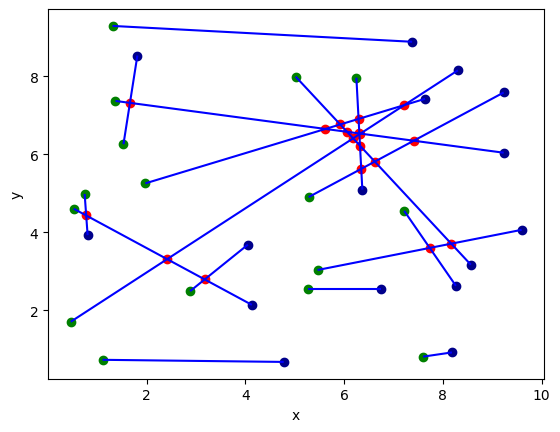

In [220]:
intersections, vis = find_intersections_with_visualization(my_sections)
vis.show()
vis.save_gif('GIFs/intersect', interval = 400)

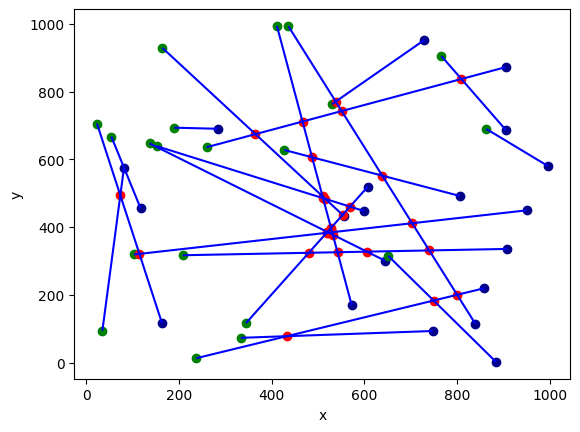

In [ ]:
intersections, vis = find_intersections_with_visualization(random_sections)
vis.show()
vis.save_gif('GIFs/rand_intersect', interval = 400)

### Czy konieczne były zmiany w strukturze zdarzeń. Jeśli tak, to jakie? Czy w przypadku obu algorytmów konieczne są takie same struktury zdarzeń?
### Odpowiedź uzasadnij. 

In [ ]:
# Odpowiedź here

### Jak obsługiwane są zdarzenia początku odcinka, końca odcinka i przecięcia odcinków z uwzględnianiem wybranych struktur danych?

In [ ]:
# Odpowiedź here

### Samemu zaprojektuj test, który uwzględnia taki układ odcinków, przy którym pewne przecięcia będą wykrywane więcej niż jeden raz

In [ ]:
# testing_sections = ???

In [ ]:
### Czy Twój program uwzględnia powyższy przypadek? Jeśli tak, to jak? 

In [ ]:
# Odpowiedź here

### Zadanie dodatkowe
Zaimplementuj inną strukturę stanu. Opisz ją w sprawozdaniu. Porównaj efektywność algorytmu dla obu struktur robiąc testy na odpowiednio dużych zestawach odcinków.